# COVID-19 data from GitHub

### <font color='green'>https://github.com/bojan-vujic/COVID-19</font>

### All the functions needed in this notebook are stored in the files <font color='green'><a href="https://github.com/bojan-vujic/COVID-19/blob/master/Python/functions.py">functions.py</a></font> and <font color='green'><a href="https://github.com/bojan-vujic/COVID-19/blob/master/Python/plots.py">plots.py</a></font>
<blockquote>
 
<font color='royalblue'>functions.py</font>
 * <font color='green'> read_data_from_github(`baseURL`, `date_to_process`): </font> reads the data from github

 * <font color='green'>display_data(`TOP_n_countries`, `Recent_n_days`, `pd_dataframe`):</font> displays the data for the given pd_dataframe (confirmed, ...)
 
 * <font color='green'>display_data_for_selected_countries(`countries_to_display`, `Last_n_days`, `date_to_process`, `pd_dataframe`)</font>
 
 * <font color='green'>world_population():</font> returns a pd_dataframe with the population for most of countries
 
 * <font color='green'>get_population_area_and_country_ISO_code(`country`, `population_df`):</font> self explanatory.
 
 * <font color='green'>data_larger_than_min_cases(`country`, `min_cases`, `pd_dataframe`):</font>
 
 * <font color='green'>list_of_countries(`pd_dataframe`):</font> returns a list of countries within a pd_dataframe (confirmed)
 
</blockquote>
 
<blockquote>
 
<font color='royalblue'>plots.py</font>
 
 
 
</blockquote>

<font color='royalblue'>Use help for a function:</font> it will return a short description.
```python
help(get_population_area_and_country_ISO_code)
```

### Import some packages and predefined functions

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import date, timedelta
%run functions.py
%run plots.py

# My github page hosting the data
baseURL = "https://raw.githubusercontent.com/bojan-vujic/COVID-19/master/Data/"

# or localy once you download the data
baseURL = "CSV_data/Github/"

# date for which data will be processed
# this can be easily written as a for loop (see next cell)
#date_to_process = "04-05-2020"      # this date is used on a few instances across the notebook

d = dt.datetime.today()
date_to_process = d.strftime('%m-%d-%Y')

#date_to_process = "04-05-2020"
print(date_to_process)

04-06-2020


In [2]:
import datetime as dt
from datetime import date, timedelta

first_day = "03-31-2020"
d1 = dt.datetime.strptime(first_day, '%m-%d-%Y').date()
d2 = date.today() - timedelta(days=1)

for i in range(10**3):
    day = d1 + timedelta(days=i)
    if day <= d2:
        day = day.strftime('%m-%d-%Y')
        print(day)

03-31-2020
04-01-2020
04-02-2020
04-03-2020
04-04-2020
04-05-2020


### Read data from github page

In [3]:
confirmed, recovered, death = read_data_from_github(baseURL, date_to_process)

TOP_n_countries = 5
Last_n_days     = 3

display_data(TOP_n_countries, Last_n_days, confirmed)

,04-04-2020,04-05-2020,04-06-2020
Date\Country,,,
World,1197859,1269240,1286294
US,308124,334730,336851
Spain,126168,131646,135032
Italy,124632,128948,128948
Germany,96092,100123,100132


In [4]:
display_data(TOP_n_countries, Last_n_days, recovered)

,04-04-2020,04-05-2020,04-06-2020
Date\Country,,,
World,246185,261200,271882
China,76755,76964,77078
Spain,34219,38080,40437
Germany,26400,28700,28700
Iran,19736,19736,24236


In [5]:
display_data(TOP_n_countries, Last_n_days, death)

,04-04-2020,04-05-2020,04-06-2020
Date\Country,,,
World,64584,69346,70446
Italy,15362,15887,15887
Spain,11947,12641,13055
US,8392,9572,9620
France,7560,8078,8078


### Display data for selected countries and sort them by number of cases

In [6]:
countries_to_display = ["World", "Sweden", "Norway", "Finland", "Russia", "US", "Italy", "Denmark", "Japan"]

# Displayed data will be sorted by number of cases, hence the order of countries in the array and on displayed data
Last_n_days = 3

display_data_for_selected_countries(countries_to_display, Last_n_days, date_to_process, confirmed)

,04-04-2020,04-05-2020,04-06-2020
Date\Country,,,
World,1197859,1269240,1286294
US,308124,334730,336851
Italy,124632,128948,128948
Sweden,6443,6830,6830
Russia,4731,5389,6343
Norway,5550,5687,5760
Denmark,4077,4369,4647
Japan,2935,3139,3654
Finland,1882,1927,2176


### World population dataframe

In [7]:
# World population pd_dataframe read from github
csv_url = "https://raw.githubusercontent.com/bojan-vujic/COVID-19/master/World_population.csv"
population = world_population(csv_url)

# list of countries
countries = list_of_countries(confirmed)

# Sanity check
# test, print data for Sweden (population, area km2, iso code)
test_country = 'Sweden'
sverige = get_population_area_and_country_ISO_code(test_country, population)

print("country    = %s" % test_country + "\npopulation = %i\narea       = %i km\u00b2\niso code   = %s\n" % sverige)

# print first few countries
print(countries[:7])

country    = Sweden
population = 10099265
area       = 450295 km²
iso code   = SE

['World', 'US', 'Spain', 'Italy', 'Germany', 'France', 'China']


### Make some directories for the data to be stored

In [8]:
import os

# Create dir "graphs"
name2   = "Graphs"
folder1 = 'By_countries'

try:
    os.makedirs('./%s/%s/%s/' % (name2, date_to_process, folder1))
    print('./%s/%s/%s/  : created' % (name2, date_to_process, folder1))
except FileExistsError:
    pass

# folder name: ./Graphs/MM-DD-YYYY/By_countries/

### Import some packages

In [9]:
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%pylab inline

from PIL import Image
import requests

from matplotlib import pylab
from pylab import *

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
    
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')

import matplotlib.gridspec as gridspec
import matplotlib.offsetbox as offsetbox
custom_preamble = {
    "text.usetex": True,
    "text.latex.preamble": [
        r"\usepackage{amsmath}", # for the align enivironment
        ],
    }
plt.rcParams.update(custom_preamble)

######################################################################
# Some colors to chose from
colors = ["orange", "purple",        "darkturquoise", "firebrick",     "limegreen",
          "olive",  "palevioletred", "gold",          "darkslategray", "mediumslateblue",
          "teal",   "sandybrown",    "greenyellow",   "khaki",         "royalblue"]



Populating the interactive namespace from numpy and matplotlib


# Plot data for Top_n_countries

### User input settings

In [10]:
# Find array for last n days that will be plotted, hence this number can not be set larger than len(confirmed)
# if set to let say 10**5, it will still be limitted to len(confirmed)
# any integer
Last_n_days_country = 21
World_n_days        = 35

# Number of n_x_ticks on x_axis
# we want at least n_x_ticks
# any integer
n_x_ticks = 12

# Top n countries to plot, sorted by number of confirmed cases
# any integer value
TOP_n_countries = 3

# Scale for x axis: 'lin', 'log'
SCALE = 'lin'

# Chose which countries to display within this notebook.
# If unsure about name of some country, print all the countries and see from there.
# any string that is valid country name
countries_to_display = ['World', 'US', 'Sweden', 'Italy', 'Spain', 'Germany', 'France', 
                        'United Kingdom', 'Switzerland', 'Netherlands']

# make a plot for each counry, confirmed, recovered, death and active cases for a given number of days
make_plot_of_real_data = 'Yes'

### Process all TOP_n_countries

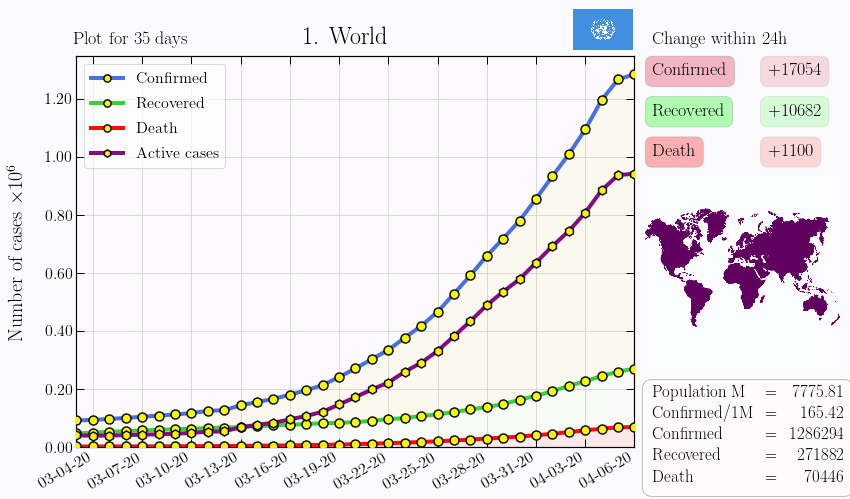

  1 World                     : saved to  ./Graphs/04-06-2020/By_countries/1_World_lin.pdf  - GLOBE


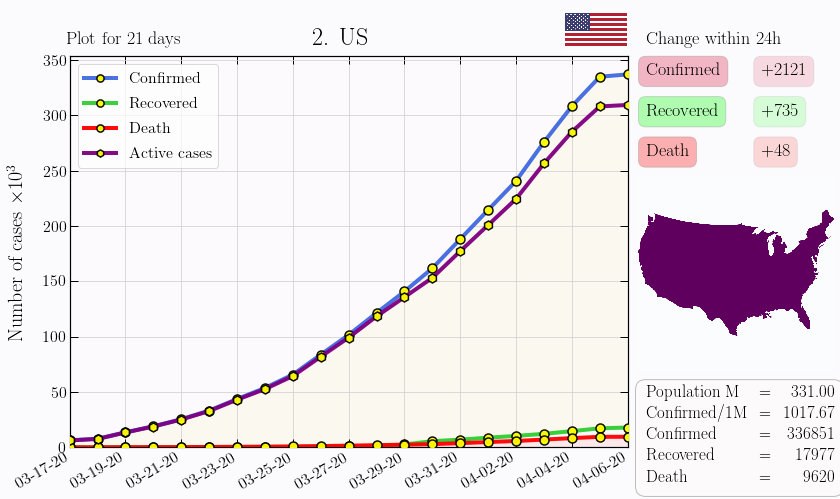

  2 US                        : saved to  ./Graphs/04-06-2020/By_countries/2_US_lin.pdf  - US


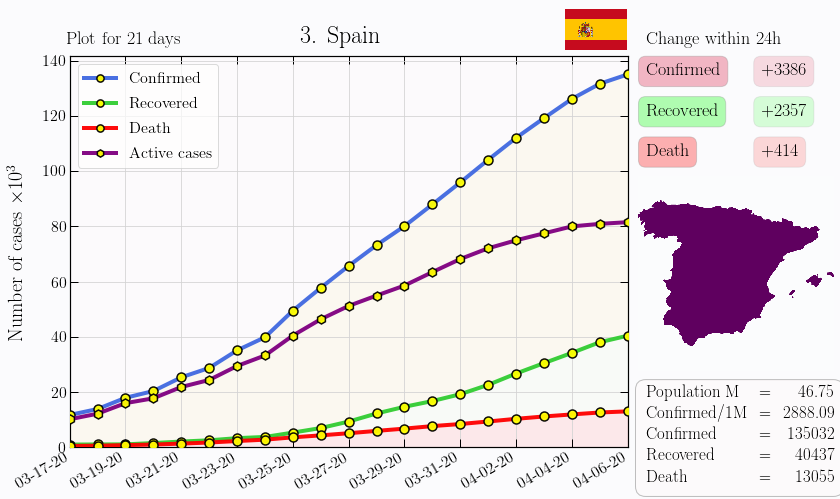

  3 Spain                     : saved to  ./Graphs/04-06-2020/By_countries/3_Spain_lin.pdf  - ES


In [11]:
for i in range(len(countries)):
    country = countries[i]
    if i < TOP_n_countries:
        Last_n_days = World_n_days if country == 'World' else Last_n_days_country
        
        x_time, x_day, y_confirmed = get_data_for_last_n_days(country, Last_n_days, confirmed)
        
        y_recovered = get_data_for_last_n_days(country, Last_n_days, recovered)[2]
        y_death     = get_data_for_last_n_days(country, Last_n_days, death)[2]
        active_cases = np.subtract(np.subtract(y_confirmed, y_recovered), y_death)
        
        # Number on "date_to_process"
        x_confirmed, x_recovered, x_death = conf_rec_dea(country, date_to_process, confirmed, recovered, death)
        
        country_population, country_area, country_iso_code = get_population_area_and_country_ISO_code(country, population)
        delta_conf, delta_rec, delta_dea = since_one_day_before(country, date_to_process, confirmed, recovered, death)
        
        image_url = country_image_url(country_iso_code)
        flag_url  = country_flag_url(country_iso_code)
        
        if make_plot_of_real_data == 'Yes':
            time_interval = return_time_interval(Last_n_days, n_x_ticks, len(y_confirmed))
            
            fig_name = './%s/%s/%s/%i_%s_%s.pdf' % (name2, date_to_process, folder1, i+1, country.replace(" ","_"), SCALE)
            make_plot(i, country, x_time, y_confirmed, y_recovered, y_death, active_cases, SCALE, country_population,\
                x_confirmed, x_recovered, x_death, Last_n_days, delta_conf, delta_rec, delta_dea,\
                image_url, flag_url, countries_to_display, fig_name, time_interval)
            print("%3i %-25s : saved to " % (i+1, country), fig_name, " - %s" % country_iso_code)
        
        else:
            print("%3i %-25s" % (i+1, country))

# Merge multiple pdf plots to a single file

In [12]:
from PyPDF2 import PdfFileMerger
import os.path

figures = []
for i in range(len(countries)):
    country = countries[i]
    if i < 1000:
        fig_name = './%s/%s/By_countries/%i_%s_%s.pdf' % (name2, date_to_process, i+1, country.replace(" ","_"), SCALE)
        if os.path.exists(fig_name):
            figures.append(str(fig_name))

merger = PdfFileMerger()
for figure in figures:
    merger.append(figure)

merger.write("%s/Countries_%s_%s.pdf" % (name2, date_to_process, SCALE))
merger.close()
